## KPI of E_commerce data from kaggle(see upload for source and explanation

### Connecting to the database constructed in upload code and fetching data

In [2]:
#%% Conection to local SQL server
import pyodbc 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
driver = '{SQL Server}'
server = 'LAPTOP-S1H0GINM\MYSERVER' 
databaseName = 'E_Commerce_Data'

conn_db = pyodbc.connect('Driver=' +driver+ ';'
                      'Server=' +server+ ';'
                      'Database=' +databaseName+ ';'
                      'Trusted_Connection=yes;')
cursor = conn_db.cursor()
#%% Fetching data from SQL server

SalesTargets = pd.read_sql_query('SELECT * FROM dbo.SalesTargets',conn_db)
#OrderDetails = pd.read_sql_query('SELECT * FROM dbo.OrderDetails',conn_db)
#ListOfOrders = pd.read_sql_query('SELECT * FROM dbo.ListOfOrders',conn_db)

# Matching Lists Of Orders and Order Details based on OrderID and loading it into python for further work 

Matching = pd.read_sql_query('''
SELECT *
    FROM
        OrderDetails
    LEFT OUTER JOIN
        ListOfOrders
    ON
        OrderDetails.OrderID = ListOfOrders.OrderID''',conn_db)

### Grouping Data

In [3]:
#%% Grouping Based on OrderDate and Category for both the Salestargets and the joined dataframe based on OrderDetails and ListOfOrders 

Matching['OrderDate'] = Matching['OrderDate'].str[:7] # removing dates to only keep months and year 
Groups = Matching.groupby(['Category','OrderDate']).sum()
Groups_mean = Matching.groupby(['Category','OrderDate']).mean()
Groups_size = Matching.groupby(['Category','OrderDate']).size()

SalesTargets['MonthOfOrderDate'] = SalesTargets['MonthOfOrderDate'].str[:7]
Groups_targets = SalesTargets.groupby(['Category','MonthOfOrderDate']).sum()

### Plotting actual sales vs goals 

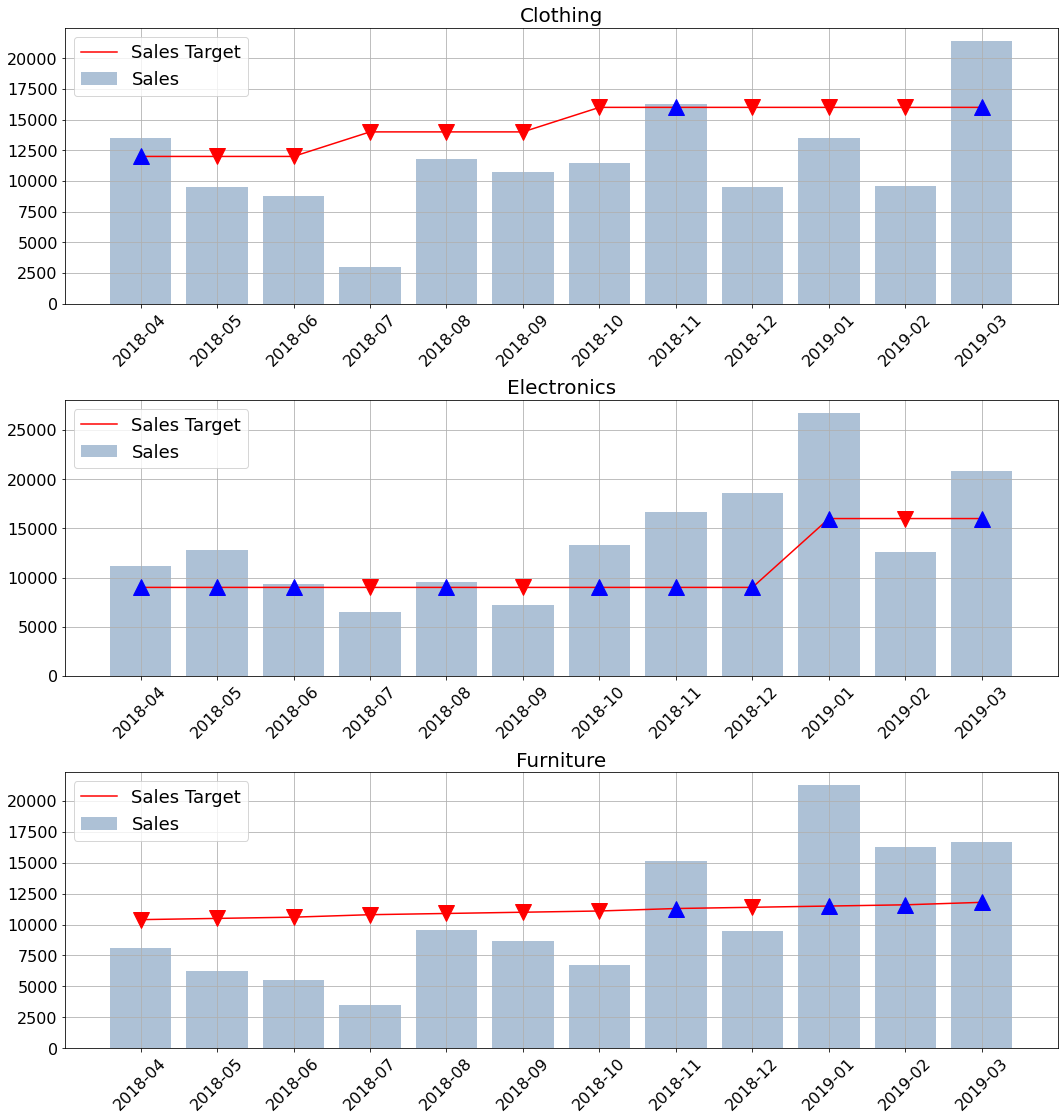

In [4]:
Categories = ['Clothing','Electronics','Furniture']

m = 1
plt.figure(figsize=(15,15))
for n in Categories:
    Groups_temp = Groups.loc[n]
    Groups_targets_temp = Groups_targets.loc[n]
    plt.subplot(3,1,m)
    plt.title(str(n),fontsize=20)
    plt.tight_layout()
    plt.bar(Groups_temp.index,Groups_temp['Amount'],color=(0.2, 0.4, 0.6, 0.4), label = 'Sales')
    plt.plot(Groups_targets_temp.index,Groups_targets_temp['SalesTarget'],'r-',label='Sales Target')
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.legend(loc='upper left',fontsize =18)
    m = m + 1
    
    CheckmarkList = []
    CheckmarkList2 = []
    for i in Groups_temp.index:
        if Groups_temp['Amount'].loc[i] > Groups_targets_temp['SalesTarget'].loc[i]:
            CheckmarkList.append(Groups_targets_temp['SalesTarget'].loc[i])
            CheckmarkList2.append(np.nan)
        else:
            CheckmarkList.append(np.nan)
            CheckmarkList2.append(Groups_targets_temp['SalesTarget'].loc[i])
            
    plt.plot(Groups_temp.index,CheckmarkList,'b^',markersize=16)
    plt.plot(Groups_temp.index,CheckmarkList2,'rv',markersize=16)

### Plotting Profits and running sum of profits

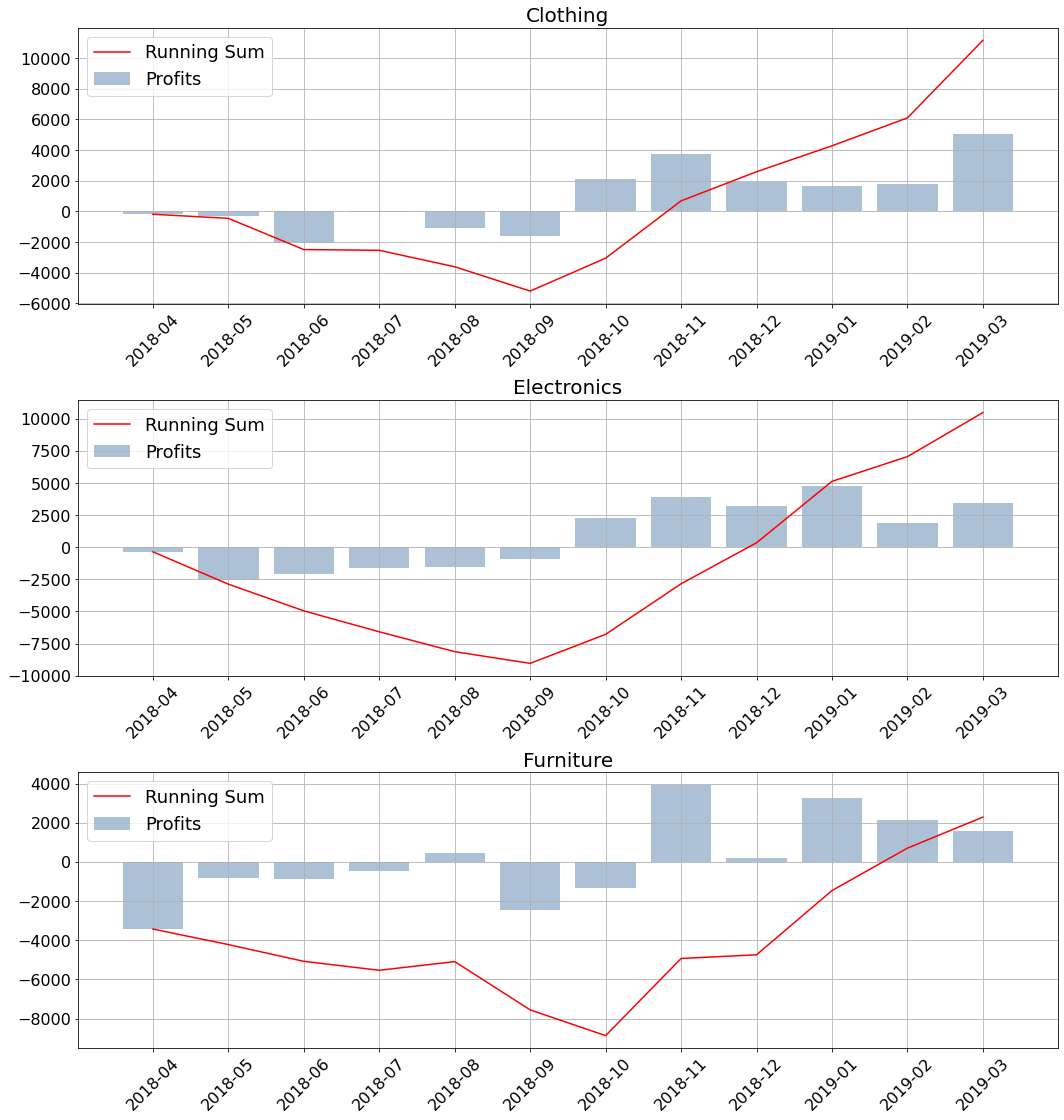

In [5]:
m = 1
plt.figure(figsize=(15,15))
for n in Categories:
    Groups_temp = Groups.loc[n]
    plt.subplot(3,1,m)
    plt.title(str(n),fontsize=20)
    plt.tight_layout()
    plt.bar(Groups_temp.index,Groups_temp['Profit'],color=(0.2, 0.4, 0.6, 0.4),label='Profits')
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    m = m + 1
    
    running_avg = []
    indexes = []
    for i in Groups_temp.index:
        indexes.append(i)
        running_avg.append(Groups_temp['Profit'].loc[indexes].sum())
    plt.plot(Groups_temp.index,running_avg,'r',label='Running Sum')
    plt.legend(loc='upper left',fontsize =18)
    

### Plotting amount of orders

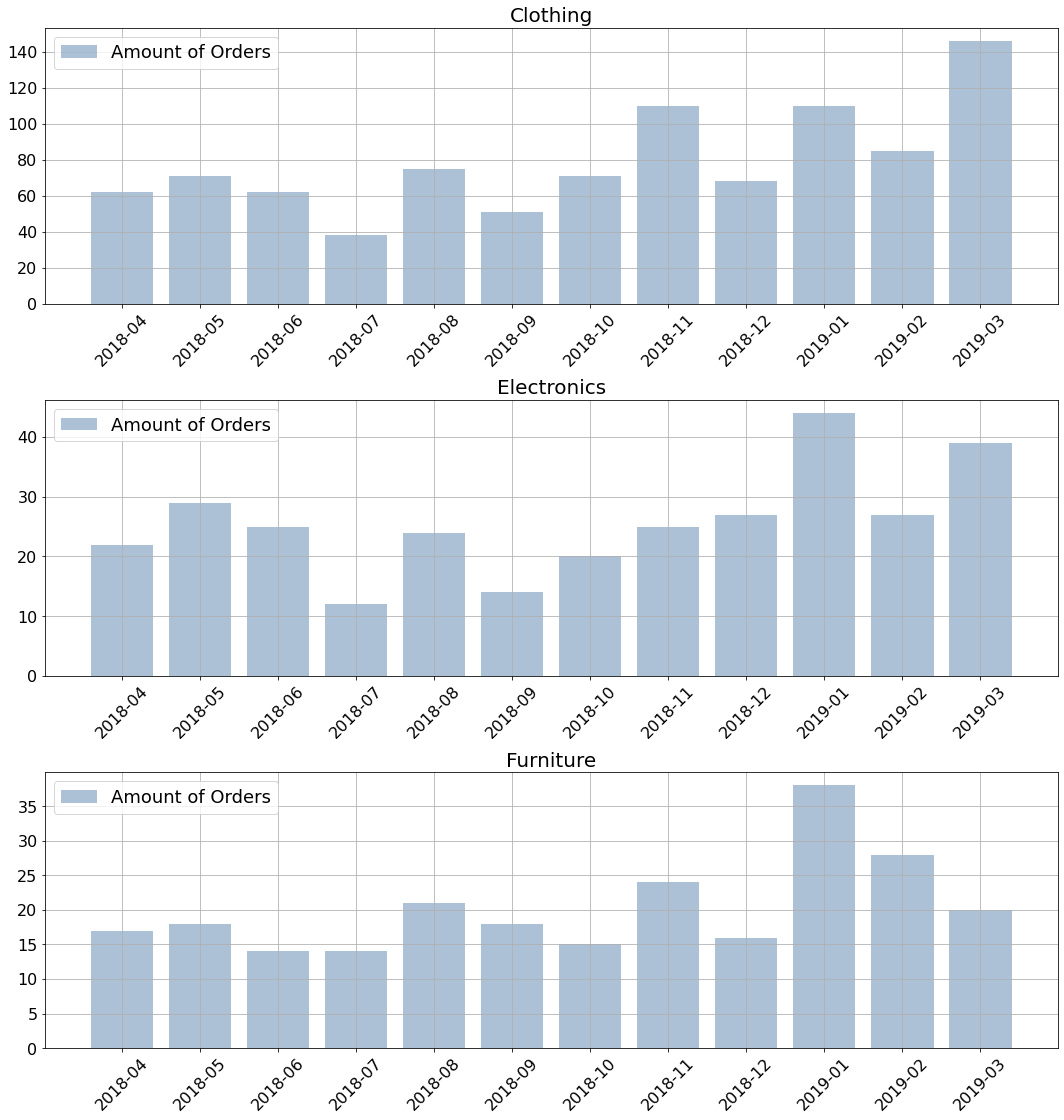

In [6]:
m = 1
plt.figure(figsize=(15,15))
for n in Categories:
    Groups_temp_size = Groups_size.loc[n]
    plt.subplot(3,1,m)
    plt.title(str(n),fontsize=20)
    plt.tight_layout()
    plt.bar(Groups_temp.index,Groups_temp_size,color=(0.2, 0.4, 0.6, 0.4),label='Amount of Orders')
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    m = m + 1
    plt.legend(loc='upper left',fontsize =18)

### Plotting mean order size

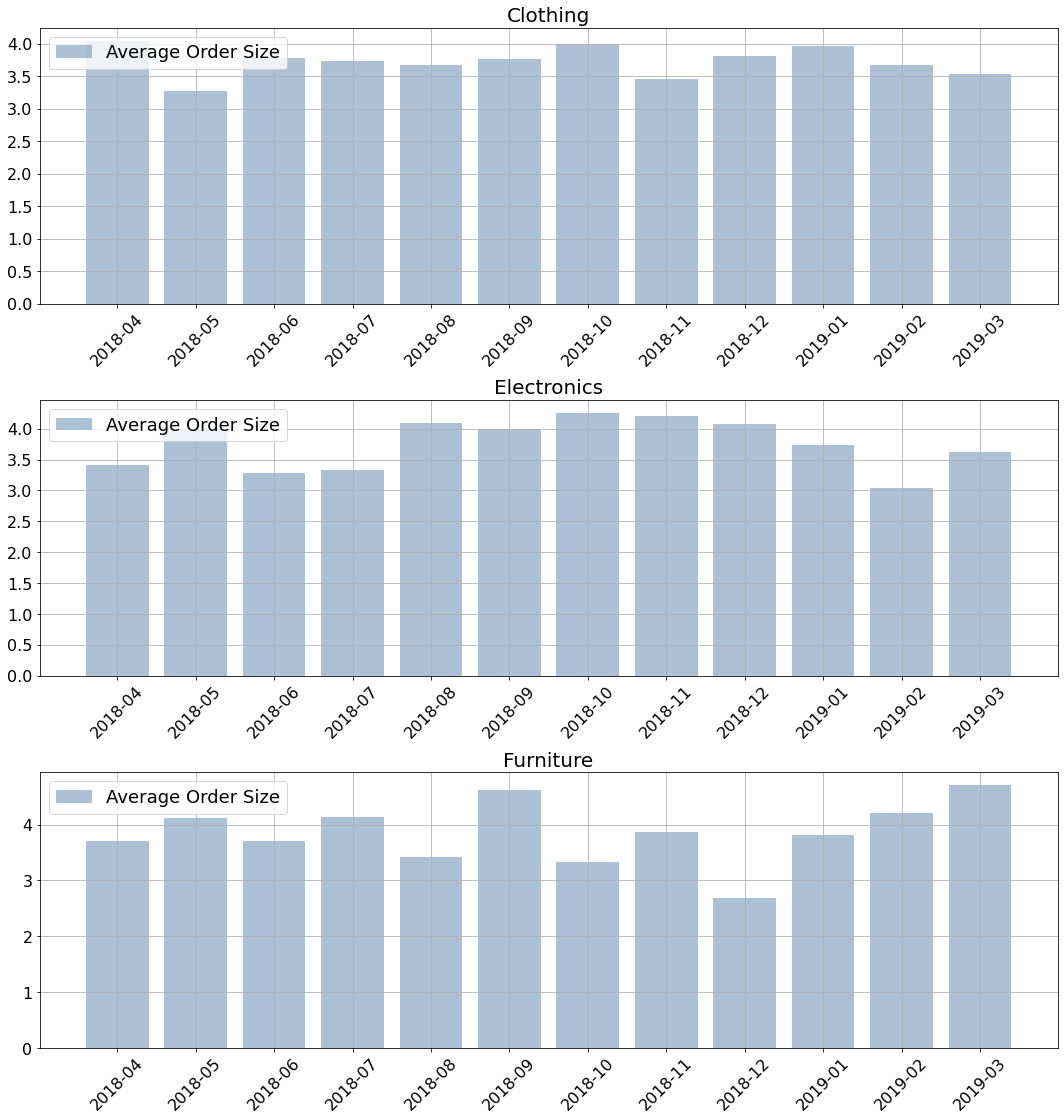

In [7]:
m = 1
plt.figure(figsize=(15,15))
for n in Categories:
    Groups_temp_mean = Groups_mean.loc[n]
    plt.subplot(3,1,m)
    plt.title(str(n),fontsize=20)
    plt.tight_layout()
    plt.bar(Groups_temp.index,Groups_temp_mean['Quantity'],color=(0.2, 0.4, 0.6, 0.4),label='Average Order Size')
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    m = m + 1
    plt.legend(loc='upper left',fontsize =18) 


### KPI based on SubCategories

In [11]:
#%% Grouping based on  OrderDate and Category and SubCategory

# Removing everything except my connection so SQL server 
a = dir()
a.remove('conn_db')

for name in a:
    if not name.startswith('_'):
        del globals()[name]
        
del a; del name

import pyodbc 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#%% Fetching data from SQL server

#SalesTargets = pd.read_sql_query('SELECT * FROM dbo.SalesTargets',conn_db)
#OrderDetails = pd.read_sql_query('SELECT * FROM dbo.OrderDetails',conn_db)
#ListOfOrders = pd.read_sql_query('SELECT * FROM dbo.ListOfOrders',conn_db)

# Matching Lists Of Orders and Order Details based on OrderID and loading it into python for further work 

Matching = pd.read_sql_query('''
SELECT *
    FROM
        OrderDetails
    LEFT OUTER JOIN
        ListOfOrders
    ON
        OrderDetails.OrderID = ListOfOrders.OrderID''',conn_db)
        
#%% Grouping Based on OrderDate and Category for both the Salestargets and the joined dataframe based on OrderDetails and ListOfOrders 

Matching['OrderDate'] = Matching['OrderDate'].str[:7] # removing dates to only keep months and year 
Groups = Matching.groupby(['SubCategory','OrderDate']).sum()
Groups_mean = Matching.groupby(['SubCategory','OrderDate']).mean()
Groups_size = Matching.groupby(['SubCategory','Category','OrderDate']).size()

### Plotting Sales based on Sub Categories

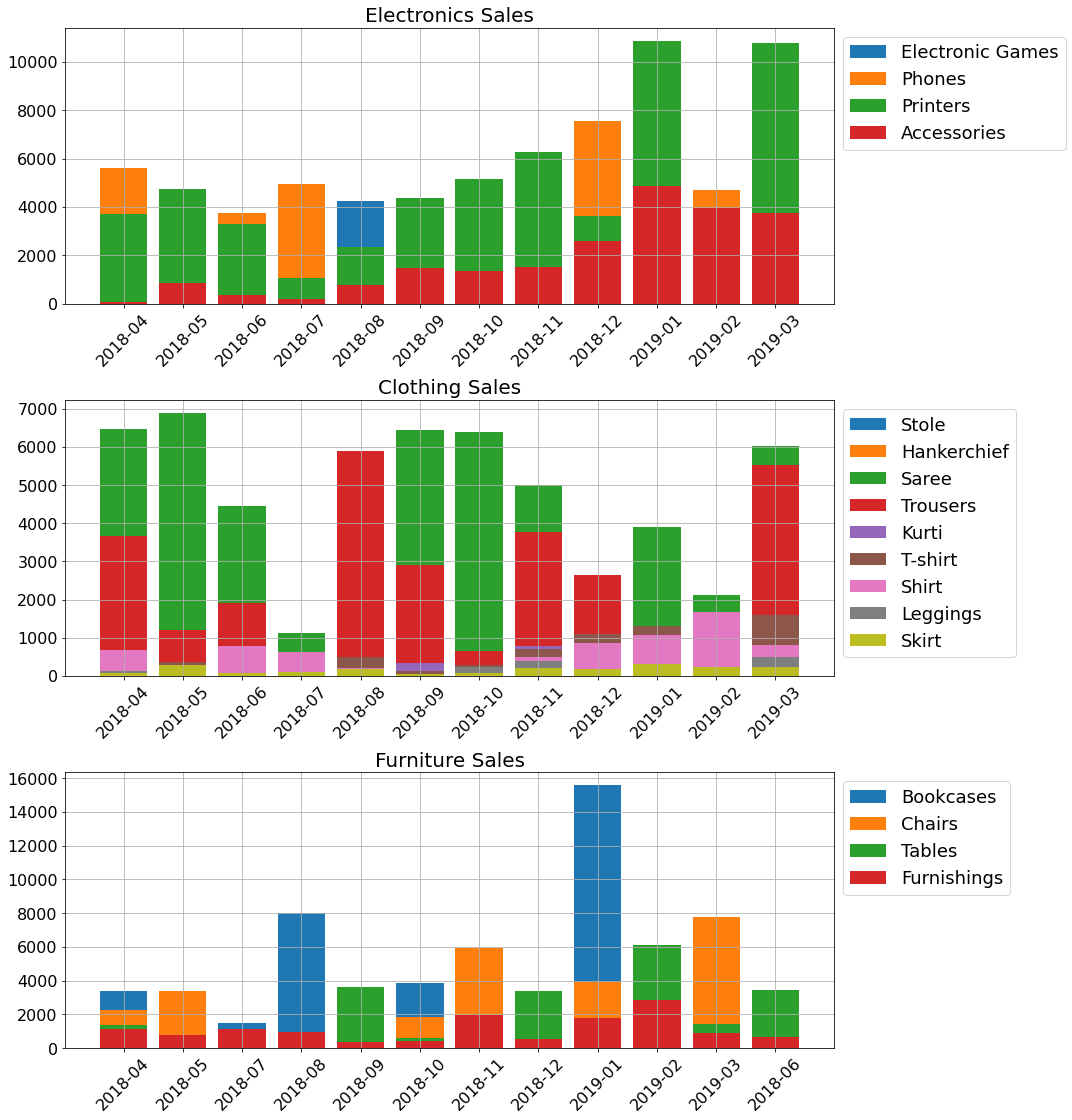

In [12]:
#%% Plotting actual sales based on subcategories
Categories = list(set(Matching['Category']))
SubCategories = list(set(Matching['SubCategory']))

Matching2 = Matching.copy()
Matching2.drop_duplicates(subset ="SubCategory", keep = 'first', inplace = True)

m = 1
plt.figure(figsize=(15,15))
for x in Categories:
    plt.subplot(3,1,m)
    for n in Matching2['SubCategory'].loc[x == Matching2['Category']] :
        Groups_temp = Groups.loc[str(n)]
        plt.bar(Groups_temp.index,Groups_temp['Amount'], label = str(n))
    plt.title(str(x) + ' Sales',fontsize=20)
    plt.tight_layout()
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize =18)    
    m = m + 1

### PLotting Profits destributed between Sub Categories

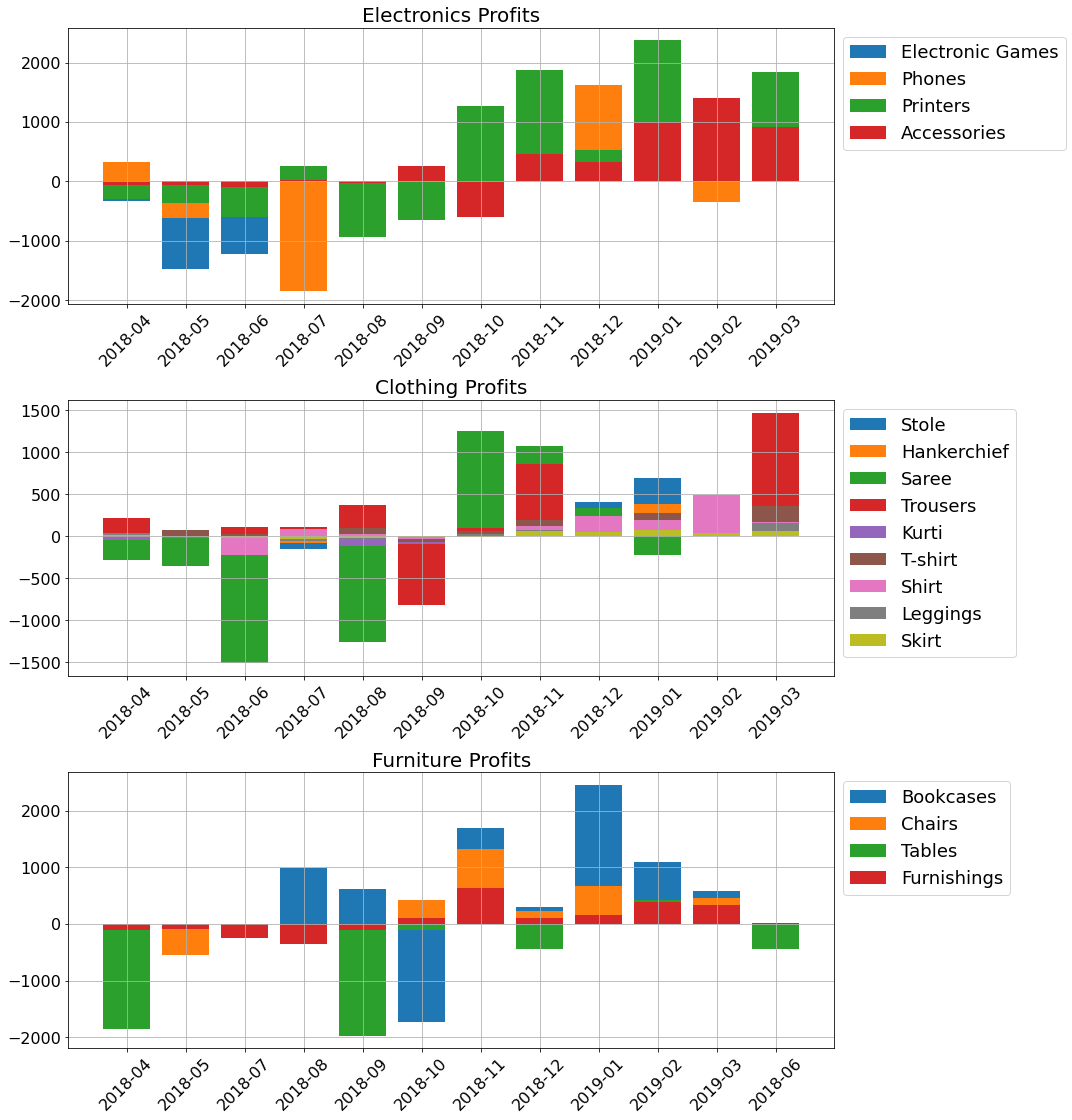

In [13]:
m = 1
plt.figure(figsize=(15,15))
for x in Categories:
    plt.subplot(3,1,m)
    for n in Matching2['SubCategory'].loc[x == Matching2['Category']] :
        Groups_temp = Groups.loc[str(n)]
        plt.bar(Groups_temp.index,Groups_temp['Profit'], label = str(n))
    plt.title(str(x) + ' Profits',fontsize=20)
    plt.tight_layout()
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize =18)    
    m = m + 1